In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle

In [2]:
main_path = Path('..')

In [12]:
def get_x_y(clash_dict_, info_nbr_dict_):
    '''
        This function calculates the clash % for ery position
        Return:
            ndarray x - position
            ndarray y - clash %
    '''
    dnmt_atoms_consider_clash = info_nbr_dict_["dnmt_atoms_consider_clash"]
    print('Dnmt atoms for clash', dnmt_atoms_consider_clash)
    x = np.array(sorted(clash_dict_.keys()))
    y = []

    for pos in x:
        all_clashes = 0
        for clash_res in clash_dict_[pos]['steric_clash_list'].keys():
            atom_clashes = clash_dict_[pos]['steric_clash_list'][clash_res]
            nbr_clash_atoms = 0
            seen_atoms = set()
            for ac in atom_clashes:
                dnmt_atom = ac[0]
                nuc_atom = ac[1]
                if dnmt_atom not in seen_atoms:
                    seen_atoms.add(dnmt_atom)
                    nbr_clash_atoms += 1
            
            all_clashes += nbr_clash_atoms

        perc_clash_atoms = (float(all_clashes)/float(dnmt_atoms_consider_clash))*100
        y.append(perc_clash_atoms)

    y = np.array(y)

    return x, y

In [16]:
def get_x_y_dict(x, y):
    x_y_dict = dict()
    for i in range(0,len(x)):
        x_y_dict[x[i]] = y[i]
    
    return x_y_dict

In [20]:
def plot_steric_clash(x_y_clash_dict):
    x = list(x_y_clash_dict.keys())
    y = list(x_y_clash_dict.values())

    fig = plt.figure(figsize=(18, 7))
    ax = plt.subplot(111)

    ax.plot(x, y, linestyle="-", marker="o", linewidth=2)
    for pos in range(0,len(x)):
        ax.text(x[pos]+0.2, y[pos]+0.7, x[pos], fontsize=12)
        
    plt.xlim(0,140)
    plt.xticks(range(0,len(x)+5,5), fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Nucleosome position [bp]", fontsize=18)
    plt.ylabel("DNMT1 atoms clashing [%]", fontsize=18)
    plt.ylim(top=100)

    ax.axvline(x=74,c="grey",linewidth=2,linestyle="--")

### Unpacked Conformation - 1KX5

In [3]:
steric_path_1kx5 = main_path / 'superposition' / 'clash_1KX5'
clash_dict_loc_1kx5 = steric_path_1kx5 / 'clash_dict'
info_dict_loc_1kx5 = steric_path_1kx5 / 'info_nbr_dict'

In [4]:
with open(clash_dict_loc_1kx5, 'rb') as fin:
    clash_dict_1kx5 = pickle.load(fin)
with open(info_dict_loc_1kx5, 'rb') as fin:
    info_nbr_dict_1kx5 = pickle.load(fin)

In [5]:
info_nbr_dict_1kx5

{'model_dnmt_nbr_residues': 947,
 'model_dnmt_nbr_atoms': 7989,
 'dnmt_atoms_consider_clash': 7212}

In [9]:
x_1kx5, y_1kx5 = get_x_y(clash_dict_1kx5, info_nbr_dict_1kx5)

Dnmt atoms for clash 7212


In [17]:
x_y_dict_1kx5 = get_x_y_dict(x_1kx5, y_1kx5)

In [21]:
## Save file
with open(steric_path_1kx5 / 'x_y_dict', 'wb') as fout:
    pickle.dump(x_y_dict_1kx5, fout, -1)

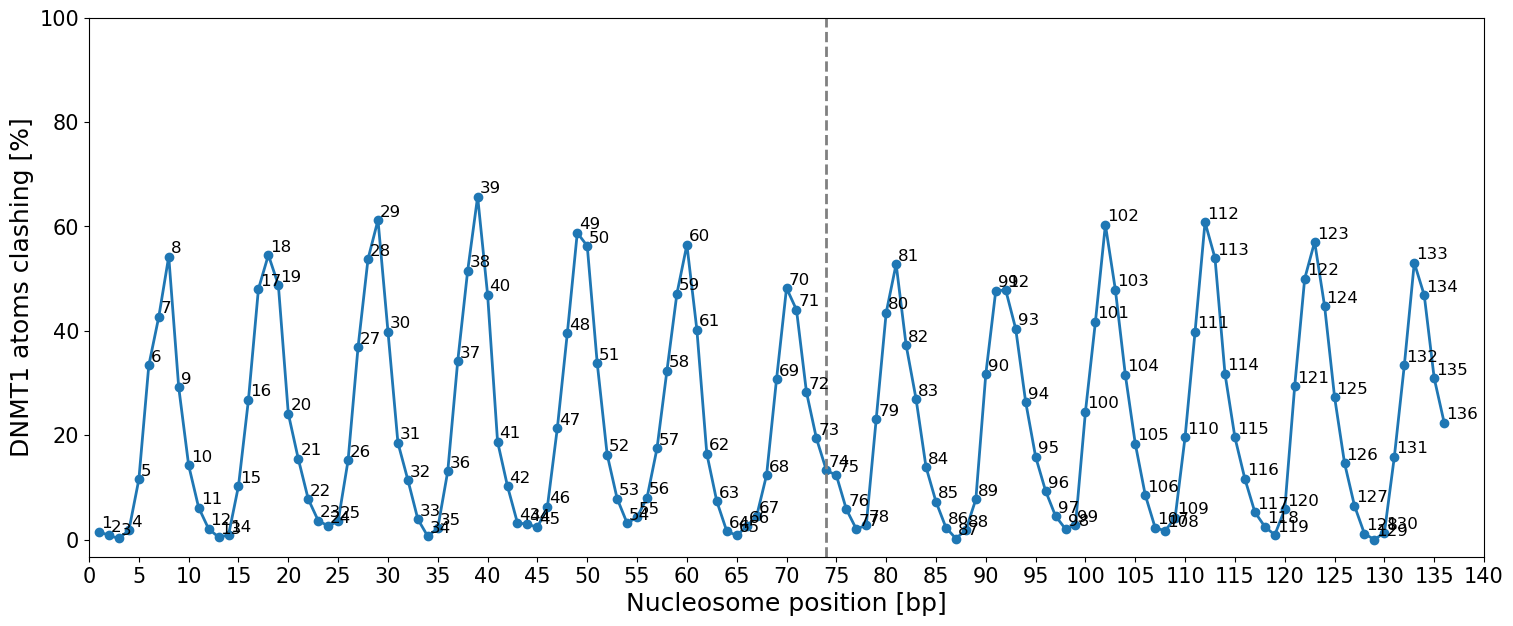

In [19]:
plot_steric_clash(x_y_dict_1kx5)

### Packed Conformation - 7V9J

In [22]:
steric_path_7v9j = main_path / 'superposition' / 'clash_7V9J'
clash_dict_loc_7v9j = steric_path_7v9j / 'clash_dict'
info_dict_loc_7v9j = steric_path_7v9j / 'info_nbr_dict'

In [23]:
with open(clash_dict_loc_7v9j, 'rb') as fin:
    clash_dict_7v9j = pickle.load(fin)
with open(info_dict_loc_7v9j, 'rb') as fin:
    info_nbr_dict_7v9j = pickle.load(fin)

In [24]:
info_nbr_dict_7v9j

{'model_dnmt_nbr_residues': 947,
 'model_dnmt_nbr_atoms': 7989,
 'dnmt_atoms_consider_clash': 7212}

In [25]:
x_7v9j, y_7v9j = get_x_y(clash_dict_7v9j, info_nbr_dict_7v9j)

Dnmt atoms for clash 7212


In [27]:
x_y_dict_7v9j = get_x_y_dict(x_7v9j-126, y_7v9j) ## to keep reletive start as 1

In [28]:
## Save file
with open(steric_path_7v9j / 'x_y_dict', 'wb') as fout:
    pickle.dump(x_y_dict_7v9j, fout, -1)

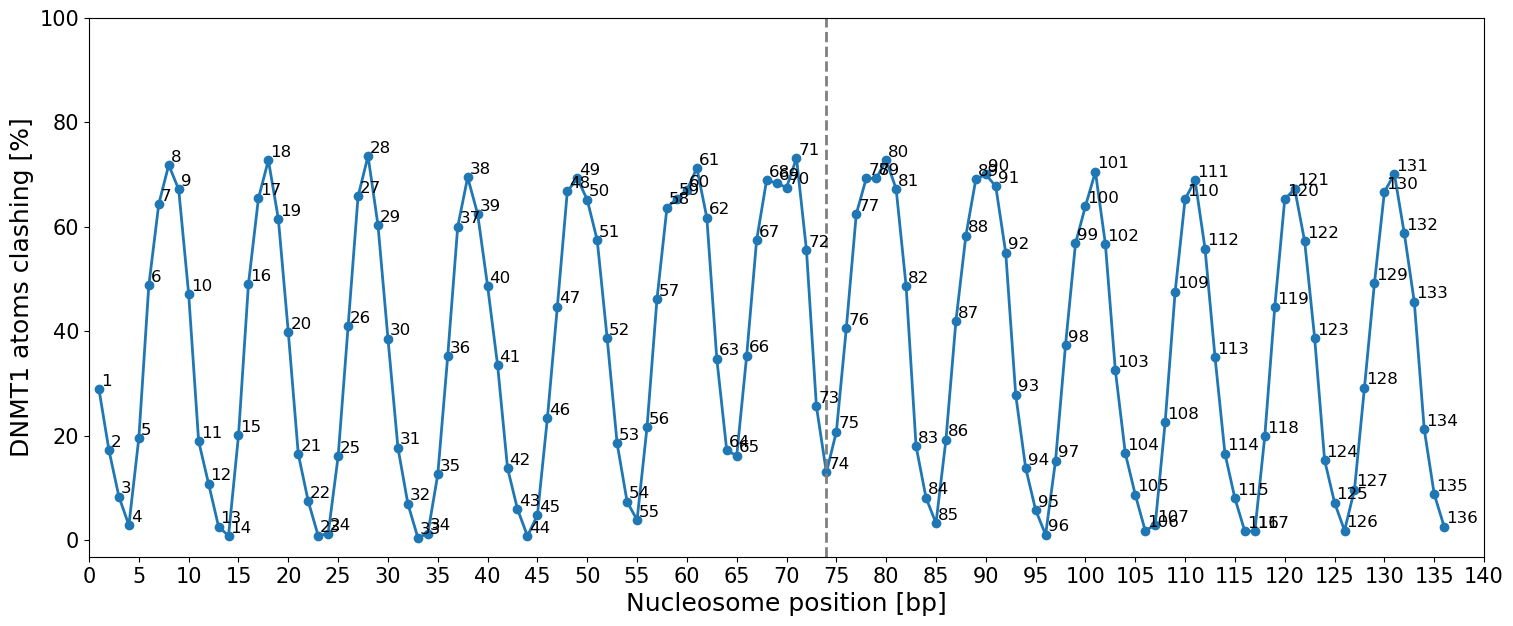

In [29]:
plot_steric_clash(x_y_dict_7v9j)